# 0. Импортируем необходимые библиотеки

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1. Загрузка и исследование данных

## 1.1. Загрузим необходимые для работы данные

In [3]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## 1.2. Опишем, что означает каждый признак в датасете

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## 1.3. Изучим данные

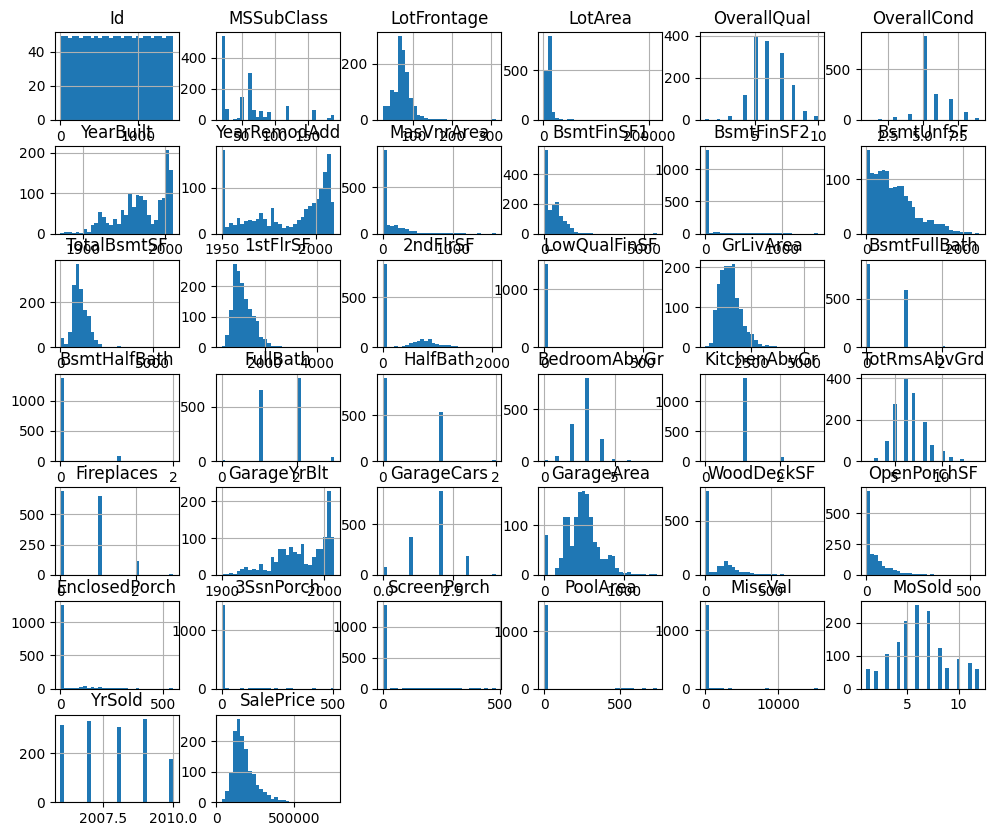

In [6]:
train.hist(figsize=(12, 10), bins=30)
plt.show()

# 2. Обработка данных

## 2.1. Посмотрим на столбцы, в которых процент пропущенных значений >50%

In [8]:
print("Признаки с более чем 50% пропущенных значений в train.csv:")
missing_data = (train.isnull().sum() / train.shape[0] * 100).round(2)
missing_data_over_50 = missing_data[missing_data > 50]
print(missing_data_over_50.astype(str) + " %")

Признаки с более чем 50% пропущенных значений в train.csv:
Alley          93.77 %
MasVnrType     59.73 %
PoolQC         99.52 %
Fence          80.75 %
MiscFeature     96.3 %
dtype: object


#### Данные признаки удалим, так как их восстановление внесёт слишком много шума в данные и будет нести мало полезной информации

In [9]:
train.drop(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
test.drop(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## 2.2. Автоматически заменим все NaN значения в категориальных признаках на моду, а в числовых на медиану

In [10]:
categorical_features = train.select_dtypes(include=['object']).columns
numerical_features = train.select_dtypes(include=['number']).columns.drop('SalePrice')

train[categorical_features] = train[categorical_features].fillna(train[categorical_features].mode().iloc[0])
train[numerical_features] = train[numerical_features].fillna(train[numerical_features].median())

test[categorical_features] = test[categorical_features].fillna(test[categorical_features].mode().iloc[0])
test[numerical_features] = test[numerical_features].fillna(test[numerical_features].median())

## 2.3. Проверим, не осталось ли больше NaN значений 

In [11]:
print("Признаки с оставшимися NaN значениями:")
missing_data = train.isnull().sum()
missing_data = missing_data[missing_data != 0]
print(missing_data)

Признаки с оставшимися NaN значениями:
Series([], dtype: int64)


#### Убедились в том, что NaN значений больше не осталось

## Нормализация данных

Так как мы будем использовать модель машинного обучения XGBoost, которая основана на решающих деревьях, то нормализация данных не требуется.

## 3. Закодируем категориальные признаки

In [12]:
def encode_categorical_features(train, test, target_col='SalePrice'):
    # Определение категориальных признаков
    categorical_features = train.select_dtypes(include=['object']).columns
    
    # Объявляем экземпляры кодировщиков
    label_encoder = LabelEncoder()
    onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
    target_encoder = TargetEncoder()

    # Функция для выбора подходящего метода кодировки
    def choose_encoding_method(categorical_features, threshold_onehot=10):
        encoders = {}
        for feature in categorical_features:
            num_unique_values = train[feature].nunique()
            if num_unique_values == 2:
                # Используем Label Encoding только для бинарных признаков
                encoders[feature] = 'label'
            elif num_unique_values <= threshold_onehot:
                # Используем One-Hot Encoding для небольшого числа уникальных значений
                encoders[feature] = 'onehot'
            else:
                # Используем Target Encoding для большого числа уникальных значений
                encoders[feature] = 'target'
        return encoders

    encoding_methods = choose_encoding_method(categorical_features)
    
    # Кодирование категориальных признаков
    for feature, method in encoding_methods.items():
        if method == 'onehot':
            # One-Hot Encoding
            encoder = onehot_encoder.fit(train[[feature]])
            train_encoded = encoder.transform(train[[feature]])
            test_encoded = encoder.transform(test[[feature]])
            
            # Создаем DataFrame'ы с закодированными признаками и добавляем к исходным данным
            train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(), index=train.index)
            test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(), index=test.index)
            
            # Объединяем с исходными данными
            train = train.drop(feature, axis=1).join(train_encoded_df)
            test = test.drop(feature, axis=1).join(test_encoded_df)
        
        elif method == 'label':
            # Label Encoding
            train[feature] = label_encoder.fit_transform(train[feature])
            test[feature] = label_encoder.transform(test[feature])

        elif method == 'target':
            # Target Encoding
            train[feature] = target_encoder.fit_transform(train[feature], train[target_col])
            test[feature] = target_encoder.transform(test[feature])

    return train, test

train, test = encode_categorical_features(train, test, target_col='SalePrice')

In [9]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,Neighborhood,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,1,0,197965.734807,7,5,2003,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2,20,80.0,9600,1,0,197643.209810,6,8,1976,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,3,60,68.0,11250,1,0,197965.734807,7,5,2001,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,4,70,60.0,9550,1,0,209344.287867,7,5,1915,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,84.0,14260,1,0,318453.591177,8,5,2000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## 4. Построим саму модель. Будем использовать XGBoost

In [16]:
features = train.columns.drop(['Id', 'SalePrice'])

X = train[features]
y = train['SalePrice']

# Разделение данных на тренировочную и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели XGBoost
model = xgb.XGBRegressor()  
model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = model.predict(X_val)
print(f'Root mean squared error: {mean_squared_error(y_val, y_pred, squared=False)}')
print(f'R2 score: {r2_score(y_val, y_pred)}')

Root mean squared error: 27164.6320927408
R2 score: 0.9037958469038081


## 5. Воспользуемся моделью для предсказания на тестовом наборе

In [17]:
# Предсказание на тестовом наборе
X_test = test[features]
predictions = model.predict(X_test)

# Сохранение результатов в файл
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': predictions})
submission.to_csv('submission.csv', index=False)